## Import libraries

In [39]:
import folium
import pandas as pd
import json
from numpy import median
from folium import Choropleth, Circle, Marker, Icon, Map
import ast
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('data/df_api.csv')

In [41]:
df.head()

,name,total_money_raised,offices_country_code,offices_state_code,offices_latitude,offices_longitude,offices_address_1,offices_address_2,offices_zip_code,vegan_rest,num_vegan_rest,preschool,num_preschool,starbucks,num_starbucks,clubs,num_clubs,weighted_punct
0,Netbiscuits,$27M,USA,NY,40.746754,-73.995323,7th Floor,275 Seventh Ave,10001,"[{'fsq_id': '5287e35711d2ab3ea77f7ebb', 'categ...",10,"[{'fsq_id': '4d370251e4b4a09380322936', 'categ...",3,"[{'fsq_id': '506c7556e4b03bdbe5afda50', 'categ...",8,"[{'fsq_id': '60da36b2d61cae1ce8d45a04', 'categ...",10,804.0
1,Aviary,$19M,USA,NY,40.749376,-73.996435,243 West 30th Street,11th Floor,10001,"[{'fsq_id': '5f161e6f978e663e91ab7155', 'categ...",10,"[{'fsq_id': '4d370251e4b4a09380322936', 'categ...",2,"[{'fsq_id': '55a555fd498e1727ae82a345', 'categ...",10,"[{'fsq_id': '4cc0b629f82ebfb7b4af6f91', 'categ...",8,800.0
2,Gilt Groupe,$236M,USA,NY,40.747270,-73.980064,2 Park Ave Fl 4,NaN,10016-5602,"[{'fsq_id': '4b02f734f964a520814b22e3', 'categ...",10,"[{'fsq_id': '52712a6911d25f0e0dfa94cb', 'categ...",1,"[{'fsq_id': '4aa01922f964a520483e20e3', 'categ...",10,"[{'fsq_id': '741d73901e18012f487f54d8', 'categ...",4,700.0
3,99designs,$35M,USA,CA,37.795531,-122.400598,447 Battery St.,3rd Floor,94111,"[{'fsq_id': '4b391baef964a520605625e3', 'categ...",10,"[{'fsq_id': '558a380a498e13330910aef6', 'categ...",1,"[{'fsq_id': '6167c8968b400716f1d65e0b', 'categ...",7,"[{'fsq_id': '4f32bd4d19836c91c7f53884', 'categ...",7,676.0
4,Minted,$52.7M,USA,CA,37.797435,-122.403175,747 Front Street,2nd Floor,94111,"[{'fsq_id': '4b391baef964a520605625e3', 'categ...",10,"[{'fsq_id': '5cc0a9cac0c0840025deceea', 'categ...",3,"[{'fsq_id': '49d0da91f964a520395b1fe3', 'categ...",3,"[{'fsq_id': '55ed1abb498e9e55d2e0edfc', 'categ...",9,644.0


In [42]:
df_subset = df[df['weighted_punct'] > 600]

In [44]:
# Applies ast.literal_eval() function to the columns "vegan_rest", "preschool", "starbucks", and "clubs" of the "df_subset" dataframe. This function converts the string representation of a list of dictionaries in these columns to a list of dictionaries.

df_subset['vegan_rest'] = df_subset['vegan_rest'].apply(ast.literal_eval)
df_subset['preschool'] = df_subset['preschool'].apply(ast.literal_eval)
df_subset['starbucks'] = df_subset['starbucks'].apply(ast.literal_eval)
df_subset['clubs'] = df_subset['clubs'].apply(ast.literal_eval)

ValueError: malformed node or string: [{'fsq_id': '5287e35711d2ab3ea77f7ebb', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}, {'id': 13334, 'name': 'Sandwich Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}, {'id': 13377, 'name': 'Vegan and Vegetarian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}}], 'chains': [], 'distance': 430, 'geocodes': {'main': {'latitude': 40.744946, 'longitude': -73.990249}, 'roof': {'latitude': 40.744946, 'longitude': -73.990249}}, 'link': '/v3/places/5287e35711d2ab3ea77f7ebb', 'location': {'address': '48 W 27th St', 'census_block': '360610058001002', 'country': 'US', 'cross_street': 'btwn Broadway & 6th Avenue', 'dma': 'New York', 'formatted_address': '48 W 27th St (btwn Broadway & 6th Avenue), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'Bombay Sandwich', 'related_places': {}, 'timezone': 'America/New_York'}, {'fsq_id': '53624ca7498e18140bb9e8b4', 'categories': [{'id': 13034, 'name': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}}], 'chains': [], 'distance': 371, 'geocodes': {'drop_off': {'latitude': 40.743528, 'longitude': -73.994292}, 'main': {'latitude': 40.743323, 'longitude': -73.994378}, 'roof': {'latitude': 40.743323, 'longitude': -73.994378}}, 'link': '/v3/places/53624ca7498e18140bb9e8b4', 'location': {'address': '140 W 23rd St', 'census_block': '360610091004001', 'country': 'US', 'cross_street': '', 'dma': 'New York', 'formatted_address': '140 W 23rd St, New York, NY 10011', 'locality': 'New York', 'postcode': '10011', 'region': 'NY'}, 'name': 'Jack’s Stir Brew Coffee', 'related_places': {}, 'timezone': 'America/New_York'}, {'fsq_id': '58d3f1e7528930281485076b', 'categories': [{'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 180, 'geocodes': {'drop_off': {'latitude': 40.745314, 'longitude': -73.994759}, 'main': {'latitude': 40.745153, 'longitude': -73.994538}, 'roof': {'latitude': 40.745153, 'longitude': -73.994538}}, 'link': '/v3/places/58d3f1e7528930281485076b', 'location': {'address': '261 7th Ave', 'census_block': '360610091005001', 'country': 'US', 'cross_street': 'at W 25th St', 'dma': 'New York', 'formatted_address': '261 7th Ave (at W 25th St), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'Variety Coffee Roasters', 'related_places': {}, 'timezone': 'America/New_York'}, {'fsq_id': '49c406a8f964a5208d561fe3', 'categories': [{'id': 13001, 'name': 'Bagel Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bagels_', 'suffix': '.png'}}, {'id': 13068, 'name': 'American Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}, {'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}}], 'chains': [], 'distance': 212, 'geocodes': {'main': {'latitude': 40.746151, 'longitude': -73.997547}, 'roof': {'latitude': 40.746151, 'longitude': -73.997547}}, 'link': '/v3/places/49c406a8f964a5208d561fe3', 'location': {'address': '286 8th Ave', 'address_extended': 'Frnt 1', 'census_block': '360610091001000', 'country': 'US', 'cross_street': 'btwn W 24th & W 25th St', 'dma': 'New York', 'formatted_address': '286 8th Ave (btwn W 24th & W 25th St), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'Brooklyn Bagel & Coffee Company', 'related_places': {}, 'timezone': 'America/New_York'}, {'fsq_id': '540def3a498ee75cf369e5a6', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}, {'id': 13035, 'name': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 134, 'geocodes': {'main': {'latitude': 40.745543, 'longitude': -73.994073}, 'roof': {'latitude': 40.745543, 'longitude': -73.994073}}, 'link': '/v3/places/540def3a498ee75cf369e5a6', 'location': {'address': '275 7th Ave', 'address_extended': 'Frnt 3', 'census_block': '360610091005000', 'country': 'US', 'cross_street': 'btwn W 25th & W 26th St', 'dma': 'New York', 'formatted_address': '275 7th Ave (btwn W 25th & W 26th St), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'Seven Grams Caffe', 'related_places': {}, 'timezone': 'America/New_York'}, {'fsq_id': '460d4b66f964a52005451fe3', 'categories': [{'id': 17069, 'name': 'Grocery Store / Supermarket', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}}], 'chains': [{'id': 'c356152c-f98c-4c43-8a1e-1d16cc9ea1c8', 'name': 'Whole Foods'}], 'distance': 189, 'geocodes': {'main': {'latitude': 40.745134, 'longitude': -73.995236}, 'roof': {'latitude': 40.745134, 'longitude': -73.995236}}, 'link': '/v3/places/460d4b66f964a52005451fe3', 'location': {'address': '250 7th Ave', 'address_extended': 'Ste 511', 'census_block': '360610091001000', 'country': 'US', 'cross_street': 'at W 24th St', 'dma': 'New York', 'formatted_address': '250 7th Ave (at W 24th St), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'Whole Foods', 'related_places': {'children': [{'fsq_id': '5c88110ed69ed00039580e96', 'name': 'WFM Coffee Bar'}]}, 'timezone': 'America/New_York'}, {'fsq_id': '4a639f9ff964a52077c51fe3', 'categories': [{'id': 13064, 'name': 'Pizzeria', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}}], 'chains': [], 'distance': 375, 'geocodes': {'drop_off': {'latitude': 40.750094, 'longitude': -73.995135}, 'main': {'latitude': 40.750153, 'longitude': -73.995215}, 'roof': {'latitude': 40.750153, 'longitude': -73.995215}}, 'link': '/v3/places/4a639f9ff964a52077c51fe3', 'location': {'address': '413 8th Ave', 'address_extended': 'btwn W 30th  W 31st St', 'census_block': '360610103001012', 'country': 'US', 'cross_street': 'btwn W 30th & W 31st St', 'dma': 'New York', 'formatted_address': '413 8th Ave (btwn W 30th & W 31st St), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'NY Pizza Suprema', 'related_places': {'children': []}, 'timezone': 'America/New_York'}, {'fsq_id': '619125bafb41d06a30c7d26b', 'categories': [{'id': 13102, 'name': 'Cantonese Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}}, {'id': 13106, 'name': 'Dim Sum Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dimsum_', 'suffix': '.png'}}], 'chains': [], 'distance': 104, 'geocodes': {'drop_off': {'latitude': 40.746984, 'longitude': -73.996589}, 'main': {'latitude': 40.747204, 'longitude': -73.996497}, 'roof': {'latitude': 40.747204, 'longitude': -73.996497}}, 'link': '/v3/places/619125bafb41d06a30c7d26b', 'location': {'address': '251 W 26th St', 'census_block': '360610095002003', 'country': 'US', 'cross_street': 'between 7th Ave and 8th Ave', 'dma': 'New York', 'formatted_address': '251 W 26th St (between 7th Ave and 8th Ave), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'Hey Yuet', 'related_places': {}, 'timezone': 'America/New_York'}, {'fsq_id': '4f61235ce4b0d7325f17c638', 'categories': [{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}, {'id': 13068, 'name': 'American Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 447, 'geocodes': {'main': {'latitude': 40.747313, 'longitude': -74.000432}, 'roof': {'latitude': 40.747313, 'longitude': -74.000432}}, 'link': '/v3/places/4f61235ce4b0d7325f17c638', 'location': {'address': '236 9th Ave', 'census_block': '360610093001001', 'country': 'US', 'cross_street': 'at 24th St', 'dma': 'New York', 'formatted_address': '236 9th Ave (at 24th St), New York, NY 10001', 'locality': 'New York', 'postcode': '10001', 'region': 'NY'}, 'name': 'Sullivan Street Bakery', 'related_places': {'children': []}, 'timezone': 'America/New_York'}, {'fsq_id': '49d991d9f964a5204a5e1fe3', 'categories': [{'id': 13276, 'name': 'Sushi Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_', 'suffix': '.png'}}], 'chains': [], 'distance': 464, 'geocodes': {'main': {'latitude': 40.74262, 'longitude': -73.996447}, 'roof': {'latitude': 40.74262, 'longitude': -73.996447}}, 'link': '/v3/places/49d991d9f964a5204a5e1fe3', 'location': {'address': '185 7th Ave', 'address_extended': 'Manhattan', 'census_block': '360610087006001', 'country': 'US', 'cross_street': 'at W 21st St', 'dma': 'New York', 'formatted_address': '185 7th Ave (at W 21st St), New York, NY 10011', 'locality': 'New York', 'postcode': '10011', 'region': 'NY'}, 'name': 'Momoya', 'related_places': {}, 'timezone': 'America/New_York'}]

In [58]:
def pre_explode(row, name):
    new_list = []
    for i in row[name]:
        lat = i["geocodes"]["main"]["latitude"]
        lon = i["geocodes"]["main"]["longitude"]
        new_list.append((lat, lon))
    return new_list

In [59]:
# Vegan restaurant
df_subset_vegan_rest = df_subset[['name', 'offices_state_code', 'offices_latitude', 'offices_longitude', 'vegan_rest', 'num_vegan_rest']]
df_subset_vegan_rest['vegan_rest_coord'] = df_subset_vegan_rest.apply(lambda row: pre_explode(row, 'vegan_rest'), axis=1)
df_subset_vegan_rest = df_subset_vegan_rest.explode('vegan_rest_coord')
df_subset_vegan_rest = df_subset_vegan_rest.reset_index(drop=True)
df_subset_vegan_rest[['latitude', 'longitude']] = df_subset_vegan_rest['vegan_rest_coord'].apply(lambda x: pd.Series([x[0], x[1]]))
df_subset_vegan_rest = df_subset_vegan_rest.drop_duplicates(subset='vegan_rest_coord', keep='first')

In [60]:
# Preschool
df_subset_preschool = df_subset[['name', 'offices_state_code', 'offices_latitude', 'offices_longitude', 'preschool', 'num_preschool']]
df_subset_preschool['preschool_coord'] = df_subset_preschool.apply(lambda row: pre_explode(row, 'preschool'), axis=1)
df_subset_preschool = df_subset_preschool.explode('preschool_coord')
df_subset_preschool = df_subset_preschool.reset_index(drop=True)
df_subset_preschool[['latitude', 'longitude']] = df_subset_preschool['preschool_coord'].apply(lambda x: pd.Series([x[0], x[1]]))
df_subset_preschool = df_subset_preschool.drop_duplicates(subset='preschool_coord', keep='first')

In [61]:
# Starbucks
df_subset_starbucks = df_subset[['name', 'offices_state_code', 'offices_latitude', 'offices_longitude', 'starbucks', 'num_starbucks']]
df_subset_starbucks['starbucks_coord'] = df_subset_starbucks.apply(lambda row: pre_explode(row, 'starbucks'), axis=1)
df_subset_starbucks = df_subset_starbucks.explode('starbucks_coord')
df_subset_starbucks = df_subset_starbucks.reset_index(drop=True)
df_subset_starbucks[['latitude', 'longitude']] = df_subset_starbucks['starbucks_coord'].apply(lambda x: pd.Series([x[0], x[1]]))
df_subset_starbucks = df_subset_starbucks.drop_duplicates(subset='starbucks_coord', keep='first')

In [62]:
# Clubs
df_subset_clubs = df_subset[['name', 'offices_state_code', 'offices_latitude', 'offices_longitude', 'clubs', 'num_clubs']]
df_subset_clubs['clubs_coord'] = df_subset_clubs.apply(lambda row: pre_explode(row, 'clubs'), axis=1)
df_subset_clubs = df_subset_clubs.explode('clubs_coord')
df_subset_clubs = df_subset_clubs.reset_index(drop=True)
df_subset_clubs[['latitude', 'longitude']] = df_subset_clubs['clubs_coord'].apply(lambda x: pd.Series([x[0], x[1]]))
df_subset_clubs = df_subset_clubs.drop_duplicates(subset='clubs_coord', keep='first')

In [63]:
df_subset_vegan_rest['category_name'] = 'Vegan'
df_subset_preschool['category_name'] = 'Preschools'
df_subset_starbucks['category_name'] = 'Starbucks'
df_subset_clubs['category_name'] = 'Clubs'

In [64]:
near_office = pd.concat([df_subset_vegan_rest, df_subset_preschool, df_subset_starbucks, df_subset_clubs], ignore_index=True)

In [65]:
office_nearby = Map(location = [40.749376, -73.995323], zoom_start = 11.4)
vegan_group = folium.FeatureGroup(name = f"Vegan restaurants ({near_office[near_office['category_name'] == 'Vegan'].shape[0]})")
starbucks_group = folium.FeatureGroup(name = f"Starbucks ({near_office[near_office['category_name'] == 'Starbucks'].shape[0]})")
preschool_group = folium.FeatureGroup(name = f"Preschools ({near_office[near_office['category_name'] == 'Preschools'].shape[0]})")
clubs_group = folium.FeatureGroup(name = f"Clubs ({near_office[near_office['category_name'] == 'Clubs'].shape[0]})")

In [14]:
for index, row in near_office.iterrows():

    city = {
        "location": [row["latitude"], row["longitude"]],
        "tooltip": row["name"]
    }


    if row["category_name"] == "Vegan":
        icon = Icon (
            color = "lightgreen",
            prefix="fa",
            icon="leaf"

        )
    elif row["category_name"] == "Starbucks":
        icon = Icon (
            color = "darkgreen",
            prefix="fa",
            icon="coffee"
        )
    elif row["category_name"] == "Preschools":
        icon = Icon (
            color = "blue",
            prefix="fa",
            icon="school"
        )
    elif row["category_name"] == "Clubs":
        icon = Icon (
            color = "darkblue",
            prefix="fa",
            icon="martini-glass"
        )


    new_marker = Marker (**city, icon = icon)
 
    if row["category_name"] == "Vegan":
        new_marker.add_to(vegan_group)
        
    elif row["category_name"] == "Starbucks":
        new_marker.add_to(starbucks_group)
        
    elif row["category_name"] == "Preschools":
        new_marker.add_to(preschool_group)
        
    elif row["category_name"] == "Clubs":
        new_marker.add_to(clubs_group)


vegan_group.add_to(office_nearby)
starbucks_group.add_to(office_nearby)
preschool_group.add_to(office_nearby)
clubs_group.add_to(office_nearby)


folium.LayerControl(collapsed=False, position="topleft").add_to(office_nearby)

In [15]:
p1_lat_NY, p1_lon_NY, p2_lat_NY, p2_lon_NY, p3_lat_NY, p3_lon_NY = df['offices_latitude'][0], df['offices_longitude'][0], df['offices_latitude'][1], df['offices_longitude'][1], df['offices_latitude'][2], df['offices_longitude'][2]
p1_lat_CA, p1_lon_CA, p2_lat_CA, p2_lon_CA = df['offices_latitude'][3], df['offices_longitude'][3], df['offices_latitude'][4], df['offices_longitude'][4]

In [16]:
folium.Circle(location=[p1_lat_NY, p1_lon_NY], popup='Point 1A', fill_color='#ff0000', radius=500, weight=2, color="#000000").add_to(office_nearby)
folium.Circle(location=[p2_lat_NY, p2_lon_NY], popup='Point 1B', fill_color='#00ff00', radius=500, weight=2, color="#000000").add_to(office_nearby)
folium.Circle(location=[p3_lat_NY, p3_lon_NY], popup='Point 1C', fill_color='#0000ff', radius=500, weight=2, color="#000000").add_to(office_nearby)
folium.Circle(location=[p1_lat_CA, p1_lon_CA], popup='Point 1D', fill_color='#20B2AA', radius=500, weight=2, color="#000000").add_to(office_nearby)
folium.Circle(location=[p2_lat_CA, p2_lon_CA], popup='Point 1E', fill_color='#00CED1', radius=500, weight=2, color="#000000").add_to(office_nearby)

In [17]:
office_nearby

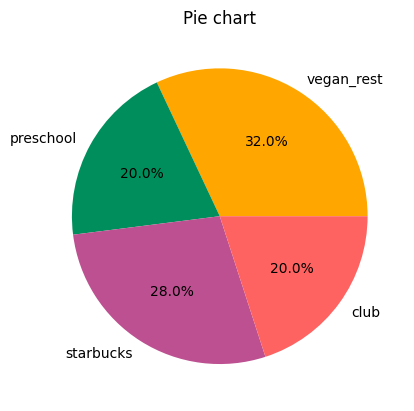

In [38]:
punctuation = {'vegan_rest': 32.0, 'preschool': 20.0, 'starbucks': 28.0, 'club': 20.0}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame.from_dict(punctuation, orient='index', columns=['Percentage'])

# Create the pie chart
plt.pie(df['Percentage'], labels=df.index, autopct='%1.1f%%', colors=['#ffa600', '#008f5c', '#bc5090', '#ff6361'])

# Add a title
plt.title('Pie chart')

# Show the plot
plt.show()